<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [1]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
#df = pd.read_csv("data/dataset_part_2.csv")
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


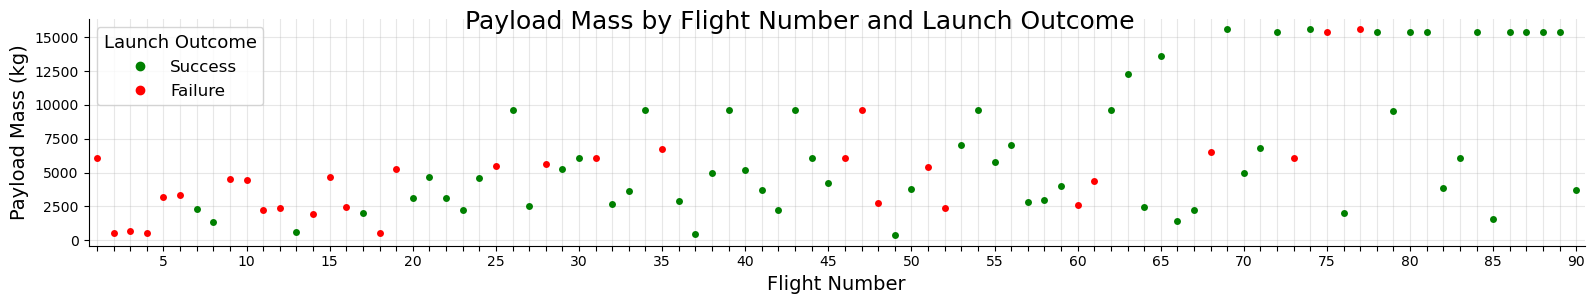

In [3]:
fig_width = 16
fig_height = 3
ax = sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class",
                 data=df, height=fig_height, aspect=fig_width/fig_height,
                 palette={0: "red", 1: "green"},
                 hue_order=[1, 0],  # Ensure Success (1) comes first in legend
                 legend=False)

fig = plt.gcf()  # Get current figure
fig.suptitle('Payload Mass by Flight Number and Launch Outcome', fontsize=18)
plt.xlabel("Flight Number",fontsize=14)
plt.ylabel("Payload Mass (kg)",fontsize=14)
ax = plt.gca()  # Get current axes
for idx, label in enumerate(ax.xaxis.get_ticklabels()):
    if (idx + 1) % 5 != 0:  # Hide every second label
        label.set_visible(False)
custom_lines = [Line2D([0], [0], marker='o', color="green", linewidth=0),
                Line2D([0], [0], marker='o', color="red", linewidth=0)]
plt.legend(custom_lines, ['Success', 'Failure'], title="Launch Outcome", 
           title_fontsize='13', fontsize='12')
plt.grid(alpha=0.3)

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


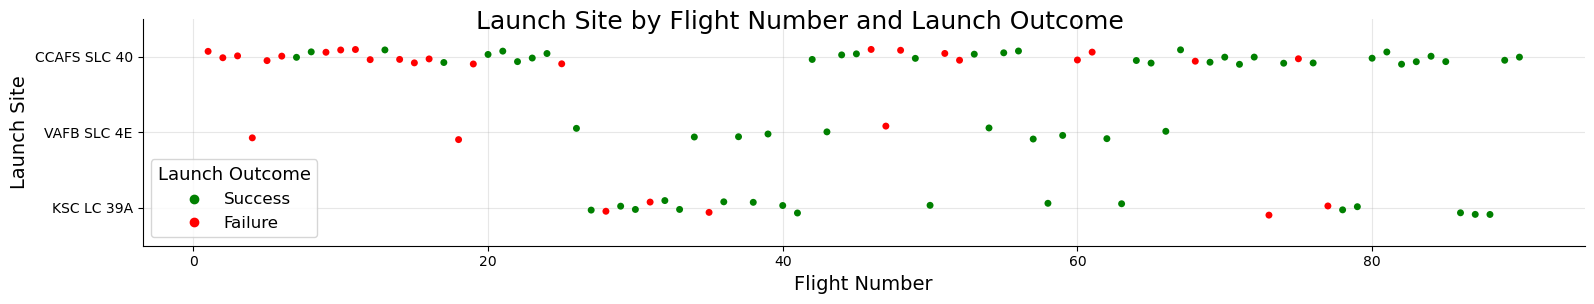

In [4]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
fig_width = 16
fig_height = 3
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class",
            data=df, height=fig_height, aspect=fig_width/fig_height,
            palette={0: "red", 1: "green"},
            hue_order=[1, 0],  # Ensure Success (1) comes first in legend
            legend=False)
fig = plt.gcf()  # Get current figure
fig.suptitle('Launch Site by Flight Number and Launch Outcome', fontsize=18)

plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
custom_lines = [Line2D([0], [0], marker='o', color="green", linewidth=0),
                Line2D([0], [0], marker='o', color="red", linewidth=0)]
plt.legend(custom_lines, ['Success', 'Failure'], title="Launch Outcome", 
           title_fontsize='13', fontsize='12')
plt.grid(alpha=0.3);

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


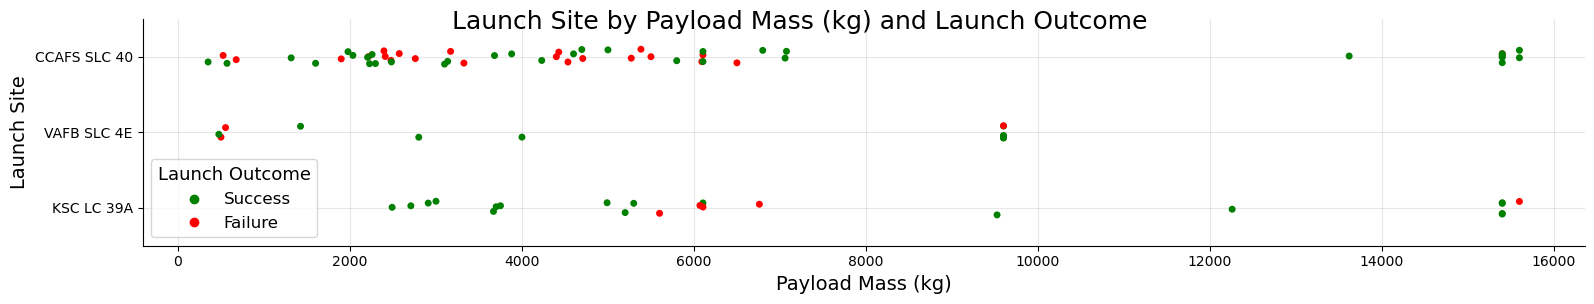

In [5]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
fig_width = 16
fig_height = 3
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class",
            data=df, height=fig_height, aspect=fig_width/fig_height,
            palette={0: "red", 1: "green"},
            hue_order=[1, 0],  # Ensure Success (1) comes first in legend
            legend=False)
fig = plt.gcf()  # Get current figure
fig.suptitle('Launch Site by Payload Mass (kg) and Launch Outcome', fontsize=18)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
custom_lines = [Line2D([0], [0], marker='o', color="green", linewidth=0),
                Line2D([0], [0], marker='o', color="red", linewidth=0)]
plt.legend(custom_lines, ['Success', 'Failure'], title="Launch Outcome", 
           title_fontsize='13', fontsize='12')
plt.grid(alpha=0.3);

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


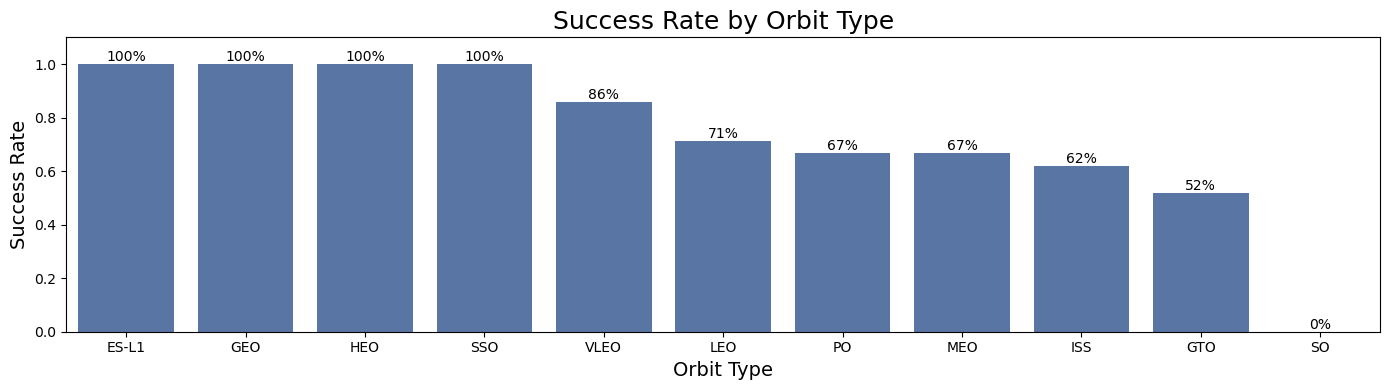

In [6]:
df_grouped = df.groupby("Orbit")["Class"].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 4))
sns.set_palette("deep")
ax = sns.barplot(x=df_grouped.index, y=df_grouped.values)
plt.title('Success Rate by Orbit Type', fontsize=18)
plt.xlabel('Orbit Type', fontsize=14)
plt.ylabel('Success Rate', fontsize=14)
plt.ylim(0, 1.1)

for i, v in enumerate(df_grouped.values):
    ax.text(i, v, f'{v:.0%}', ha='center', va='bottom')
plt.tight_layout();

Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


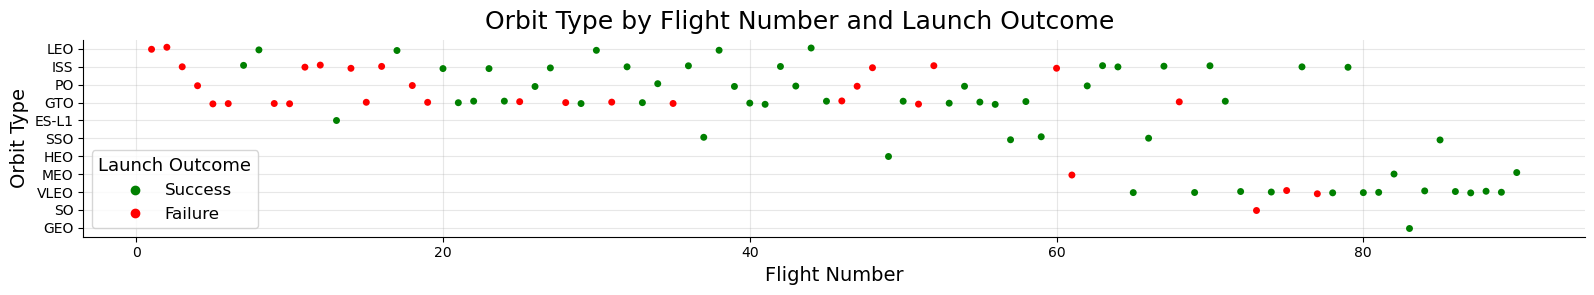

In [7]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
fig_width = 16
fig_height = 3
sns.catplot(y="Orbit", x="FlightNumber", hue="Class",
            data=df, height=fig_height, aspect=fig_width/fig_height,
            palette={0: "red", 1: "green"},
            hue_order=[1, 0],  # Ensure Success (1) comes first in legend
            legend=False)
fig = plt.gcf()  # Get current figure
fig.suptitle('Orbit Type by Flight Number and Launch Outcome', fontsize=18, y=0.95)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit Type", fontsize=14)
custom_lines = [Line2D([0], [0], marker='o', color="green", linewidth=0),
                Line2D([0], [0], marker='o', color="red", linewidth=0)]
plt.legend(custom_lines, ['Success', 'Failure'], title="Launch Outcome", 
           title_fontsize='13', fontsize='12', loc='lower left')
plt.grid(alpha=0.3);
plt.subplots_adjust(top=0.85)

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


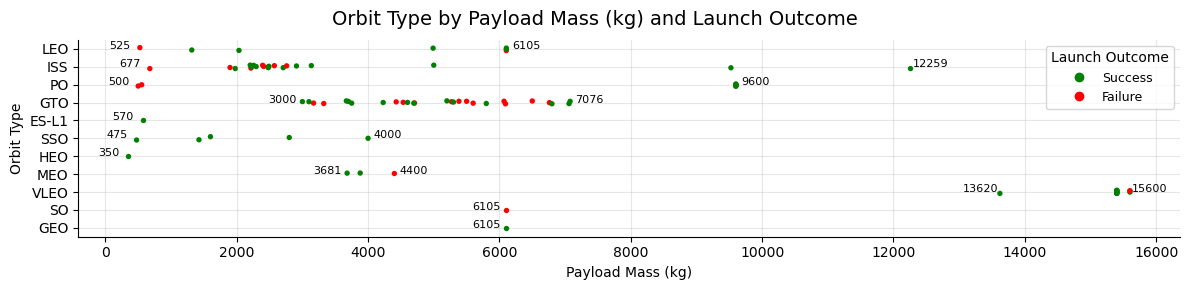

In [8]:
fig_width = 12
fig_height = 3
sns.catplot(y="Orbit", x="PayloadMass", hue="Class",
            data=df, height=fig_height, aspect=fig_width/fig_height,
            palette={0: "red", 1: "green"},
            hue_order=[1, 0],  # Ensure Success (1) comes first in legend
            legend=False, s=15)
fig = plt.gcf()  # Get current figure
fig.suptitle('Orbit Type by Payload Mass (kg) and Launch Outcome', fontsize=14, y=0.95)
plt.xlabel("Payload Mass (kg)", fontsize=10)
plt.ylabel("Orbit Type", fontsize=10)
custom_lines = [Line2D([0], [0], marker='o', color="green", linewidth=0),
                Line2D([0], [0], marker='o', color="red", linewidth=0)]
plt.legend(custom_lines, ['Success', 'Failure'], title="Launch Outcome", 
           title_fontsize='10', fontsize='9')
plt.grid(alpha=0.3)

# Find min and max PayloadMass for each Orbit
for orbit in df["Orbit"].unique():
    orbit_data = df[df["Orbit"] == orbit]
    min_payload = orbit_data["PayloadMass"].min()
    max_payload = orbit_data["PayloadMass"].max()
    
    # Annotate min PayloadMass to the left
    min_point = orbit_data[orbit_data["PayloadMass"] == min_payload].iloc[0]
    plt.annotate(f'{min_payload:.0f}', 
                 xy=(min_payload, orbit), 
                 xytext=(min_payload - 300, orbit), 
                 fontsize=8, 
                 ha='center')

    if min_payload != max_payload:
        # Annotate max PayloadMass to the right
        max_point = orbit_data[orbit_data["PayloadMass"] == max_payload].iloc[0]
        plt.annotate(f'{max_payload:.0f}', 
                     xy=(max_payload, orbit), 
                     xytext=(max_payload + 300, orbit), 
                     fontsize=8, 
                     ha='center')
plt.subplots_adjust(top=0.85)

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


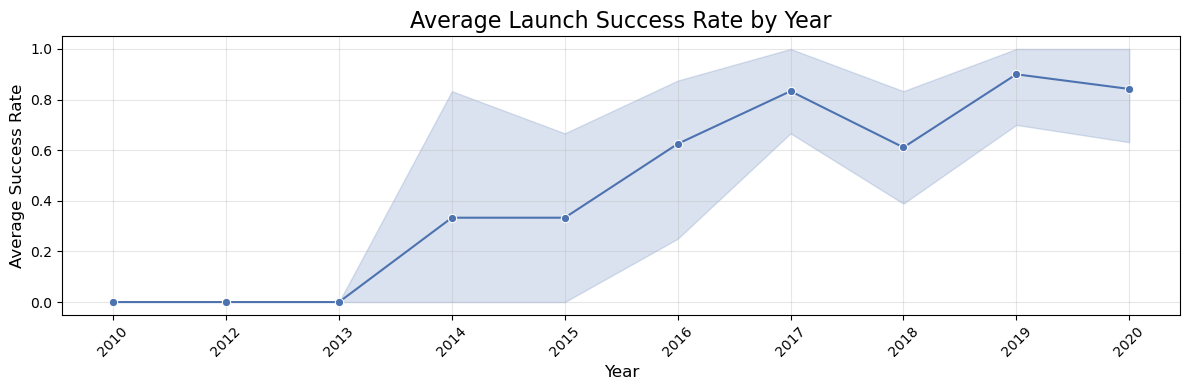

In [9]:
def extract_year(date):
    return date.split("-")[0]

df['Year'] = df['Date'].apply(extract_year)

plt.figure(figsize=(12, 4))
sns.lineplot(x='Year', y='Class', data=df, markers=True, marker='o')

years = df['Year'].unique()

plt.xticks(years, rotation=45)
plt.title('Average Launch Success Rate by Year', size=16)
plt.xlabel('Year', size=12)
plt.ylabel('Average Success Rate', size=12)
plt.grid(alpha=0.3)
plt.tight_layout()

df.drop('Year', axis=1, inplace=True)

You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [10]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [11]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [12]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


In [13]:
#features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
